In [4]:
# importing base libraries
import pandas as pd # data science essentials
import numpy as np
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression

# Additional libraries
import sklearn.linear_model # linear models
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file names
dataset_file     = './datasets/Apprentice_Chef_Dataset.xlsx'
performance_file = './model_results/linear_model_performance.xlsx'
prediction_file  = './model_results/linear_model_predictions.xlsx'


# reading the files into Python
chef     = pd.read_excel(dataset_file)
performance = pd.read_excel(performance_file)
predictions = pd.read_excel(prediction_file)

In [5]:
# Check Info
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

In [6]:
# Get columns
chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')

In [7]:
# Check missing value
chef.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [8]:
chef['log_REVENUE'] = np.log10(chef['REVENUE'])
chef['log_TOTAL_MEALS_ORDERED'] = np.log10(chef['TOTAL_MEALS_ORDERED'])
chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(chef['AVG_TIME_PER_SITE_VISIT'])
chef['log_AVG_PREP_VID_TIME'] = np.log10(chef['AVG_PREP_VID_TIME'])


In [9]:
# preparing explanatory variable data
chef_data   = chef.drop(['REVENUE',
                        'log_REVENUE',
                        'FIRST_NAME',
                        'FAMILY_NAME',
                        'NAME',
                        'EMAIL',
                        'TOTAL_MEALS_ORDERED',
                        'AVG_TIME_PER_SITE_VISIT',
                        'AVG_PREP_VID_TIME'],
                               axis = 1)


# preparing response variables
chef_target = chef.loc[ : , 'REVENUE']
log_chef_target = chef.loc[ : , "log_REVENUE"]



# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            log_chef_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 23)
y-side: (1459,)


Testing Data
------------
X-side: (487, 23)
y-side: (487,)



In [10]:
chef_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CROSS_SELL_SUCCESS           1946 non-null   int64  
 1   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 2   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 3   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 4   MOBILE_NUMBER                1946 non-null   int64  
 5   CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 6   CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 7   TASTES_AND_PREFERENCES       1946 non-null   int64  
 8   PC_LOGINS                    1946 non-null   int64  
 9   MOBILE_LOGINS                1946 non-null   int64  
 10  WEEKLY_PLAN                  1946 non-null   int64  
 11  EARLY_DELIVERIES             1946 non-null   int64  
 12  LATE_DELIVERIES              1946 non-null   int64  
 13  PACKAGE_LOCKER    

In [11]:
# declaring set of x-variables
x_variables = ['CROSS_SELL_SUCCESS', 'log_TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
               'PRODUCT_CATEGORIES_VIEWED','log_AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 
               'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN',
               'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER','log_AVG_PREP_VID_TIME', 
               'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

CROSS_SELL_SUCCESS +
log_TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
log_AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
log_AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +


In [12]:
# merging X_train and y_train so that they can be used in statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """log_REVENUE ~  CROSS_SELL_SUCCESS +
                                log_TOTAL_MEALS_ORDERED +
                                UNIQUE_MEALS_PURCH +
                                CONTACTS_W_CUSTOMER_SERVICE +
                                PRODUCT_CATEGORIES_VIEWED +
                                log_AVG_TIME_PER_SITE_VISIT +
                                MOBILE_NUMBER +
                                CANCELLATIONS_BEFORE_NOON +
                                CANCELLATIONS_AFTER_NOON +
                                TASTES_AND_PREFERENCES +
                                PC_LOGINS +
                                MOBILE_LOGINS +
                                WEEKLY_PLAN +
                                EARLY_DELIVERIES +
                                LATE_DELIVERIES +
                                PACKAGE_LOCKER +
                                REFRIGERATED_LOCKER +
                                log_AVG_PREP_VID_TIME +
                                LARGEST_ORDER_SIZE +
                                MASTER_CLASSES_ATTENDED +
                                MEDIAN_MEAL_RATING +
                                AVG_CLICKS_PER_VISIT +
                                TOTAL_PHOTOS_VIEWED """,
                                data = chef_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     148.7
Date:                Tue, 19 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:51:30   Log-Likelihood:                 1100.7
No. Observations:                1459   AIC:                            -2153.
Df Residuals:                    1435   BIC:                            -2026.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [13]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = chef.loc[ : , x_variables]


# Preparing the target variable
log_chef_target = chef.loc[ : , "log_REVENUE"]


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_data,     # x-variables
            log_chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [14]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6308
OLS Testing Score  : 0.6532
OLS Train-Test Gap : 0.0224


In [15]:
# zipping each feature name to its coefficient
lr_model_values = zip(chef_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', -5315.51)
('CROSS_SELL_SUCCESS', -107.74)
('log_TOTAL_MEALS_ORDERED', 1209.84)
('UNIQUE_MEALS_PURCH', -56.77)
('CONTACTS_W_CUSTOMER_SERVICE', 88.7)
('PRODUCT_CATEGORIES_VIEWED', 9.85)
('log_AVG_TIME_PER_SITE_VISIT', -342.76)
('MOBILE_NUMBER', 30.86)
('CANCELLATIONS_BEFORE_NOON', 12.41)
('CANCELLATIONS_AFTER_NOON', -3.73)
('TASTES_AND_PREFERENCES', 66.07)
('PC_LOGINS', -6.59)
('MOBILE_LOGINS', -39.17)
('WEEKLY_PLAN', 0.17)
('EARLY_DELIVERIES', -2.38)
('LATE_DELIVERIES', 5.5)
('PACKAGE_LOCKER', -28.85)
('REFRIGERATED_LOCKER', -19.15)
('log_AVG_PREP_VID_TIME', 2498.84)
('LARGEST_ORDER_SIZE', -48.34)
('MASTER_CLASSES_ATTENDED', 178.34)
('MEDIAN_MEAL_RATING', 242.06)
('AVG_CLICKS_PER_VISIT', -31.29)
('TOTAL_PHOTOS_VIEWED', 0.81)


In [16]:
# Develop a lasso regression model.

In [17]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 0.1,  
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.0
Lasso Testing Score  : -0.0001
Lasso Train-Test Gap : 0.0001


In [18]:
lasso_fit

Lasso(alpha=0.1, normalize=True)

In [19]:
# zipping each feature name to its coefficient
lasso_model_values = zip(chef_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3.27)
('CROSS_SELL_SUCCESS', -0.0)
('UNIQUE_MEALS_PURCH', -0.0)
('CONTACTS_W_CUSTOMER_SERVICE', -0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', -0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.0)
('REFRIGERATED_LOCKER', -0.0)
('LARGEST_ORDER_SIZE', 0.0)
('MASTER_CLASSES_ATTENDED', 0.0)
('MEDIAN_MEAL_RATING', 0.0)
('AVG_CLICKS_PER_VISIT', -0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_TOTAL_MEALS_ORDERED', 0.0)
('log_AVG_TIME_PER_SITE_VISIT', 0.0)
('log_AVG_PREP_VID_TIME', 0.0)


In [20]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3.27)
('UNIQUE_MEALS_PURCH', -0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('MOBILE_LOGINS', -0.0)
('EARLY_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.0)
('LARGEST_ORDER_SIZE', 0.0)
('MEDIAN_MEAL_RATING', 0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_AVG_TIME_PER_SITE_VISIT', 0.0)


In [21]:
# Develop an ARD model.

In [22]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.691
Testing Score : 0.6899
ARD Train-Test Gap : 0.0011


In [23]:
# zipping each feature name to its coefficient
ard_model_values = zip(chef_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1.56)
('CROSS_SELL_SUCCESS', -0.01167)
('UNIQUE_MEALS_PURCH', -0.0107)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', 0.0)
('MOBILE_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', 0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', -0.01009)
('REFRIGERATED_LOCKER', 0.0)
('LARGEST_ORDER_SIZE', -0.01472)
('MASTER_CLASSES_ATTENDED', 0.03332)
('MEDIAN_MEAL_RATING', 0.07588)
('AVG_CLICKS_PER_VISIT', 0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_TOTAL_MEALS_ORDERED', 0.23315)
('log_AVG_TIME_PER_SITE_VISIT', -0.06618)
('log_AVG_PREP_VID_TIME', 0.61275)


In [24]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1.56)
('CROSS_SELL_SUCCESS', -0.01167)
('UNIQUE_MEALS_PURCH', -0.0107)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('MOBILE_LOGINS', 0.0)
('EARLY_DELIVERIES', 0.0)
('PACKAGE_LOCKER', -0.01009)
('LARGEST_ORDER_SIZE', -0.01472)
('MASTER_CLASSES_ATTENDED', 0.03332)
('MEDIAN_MEAL_RATING', 0.07588)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_TOTAL_MEALS_ORDERED', 0.23315)
('log_AVG_TIME_PER_SITE_VISIT', -0.06618)
('log_AVG_PREP_VID_TIME', 0.61275)


In [25]:
# Develop a KNN model.

In [26]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(chef_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(chef_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.45,-1.56,-2.62,-1.44,-2.68,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-0.74,-0.36,-2.22,-0.94,-2.37,-3.65,-0.59,-2.30,-4.27,-4.55
25%,-1.45,-0.76,-0.87,-0.78,0.37,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.74,-0.36,-0.93,-0.94,-1.05,-0.65,-0.59,-0.55,-0.40,-0.70
50%,0.69,0.04,0.01,-0.13,0.37,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.74,-0.36,-0.28,0.62,0.27,-0.22,-0.59,0.04,0.13,0.05
75%,0.69,0.84,0.45,0.86,0.37,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,1.35,-0.36,0.36,0.62,0.27,0.64,0.37,0.67,0.57,0.61
max,0.69,5.63,4.83,1.52,0.37,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,1.35,2.80,4.24,3.73,2.92,2.35,8.25,2.94,5.83,4.29


In [27]:
# adding labels to the scaled DataFrame
X_scaled_df.columns = chef_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(chef_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
CROSS_SELL_SUCCESS                 0.218020
UNIQUE_MEALS_PURCH                 6.257663
CONTACTS_W_CUSTOMER_SERVICE        5.201168
PRODUCT_CATEGORIES_VIEWED          9.261178
MOBILE_NUMBER                      0.107344
CANCELLATIONS_BEFORE_NOON          2.400263
CANCELLATIONS_AFTER_NOON           0.186736
TASTES_AND_PREFERENCES             0.204082
PC_LOGINS                          0.337105
MOBILE_LOGINS                      0.278218
WEEKLY_PLAN                      184.139876
EARLY_DELIVERIES                   5.373137
LATE_DELIVERIES                    7.528947
PACKAGE_LOCKER                     0.229000
REFRIGERATED_LOCKER                0.100272
LARGEST_ORDER_SIZE                 2.400232
MASTER_CLASSES_ATTENDED            0.411780
MEDIAN_MEAL_RATING                 0.572040
AVG_CLICKS_PER_VISIT               5.444177
TOTAL_PHOTOS_VIEWED            32749.275410
log_TOTAL_MEALS_ORDERED            0.099552
log_AVG_TIME_PER_SITE_VISIT  

<ipython-input-27-4bd8d4fc9dd7>:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  {pd.np.var(chef_data)}
<ipython-input-27-4bd8d4fc9dd7>:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  {pd.np.var(X_scaled_df)}


In [28]:
# Non-Standardlized

In [29]:
# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 219)

In [30]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)


# FITTING to the training data
knn_fit = knn_reg.fit(X_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(X_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(X_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(X_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(X_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 1.0
KNN Testing Score : -0.1578
KNN Train-Test Gap: 1.1578


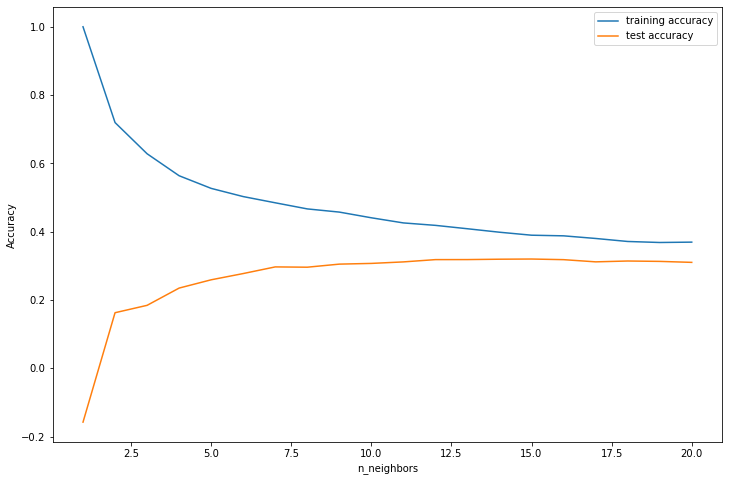

In [31]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [32]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 15


In [33]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm   = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(X_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt_fit.predict(X_test)



# SCORING the results
print('KNN Training Score:', knn_opt.score(X_train, y_train).round(4))
print('KNN Testing Score :',  knn_opt.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(X_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(X_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_opt_score_train - knn_opt_score_test).round(4))
knn_opt_test_gap = abs(knn_opt_score_train - knn_opt_score_test).round(4)

KNN Training Score: 0.3896
KNN Testing Score : 0.3199
KNN Train-Test Gap: 0.0697


In [34]:
# Standardlized

In [35]:
# this is the exact code we were using before
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            X_scaled_df,
            chef_target,
            test_size = 0.25,
            random_state = 219)

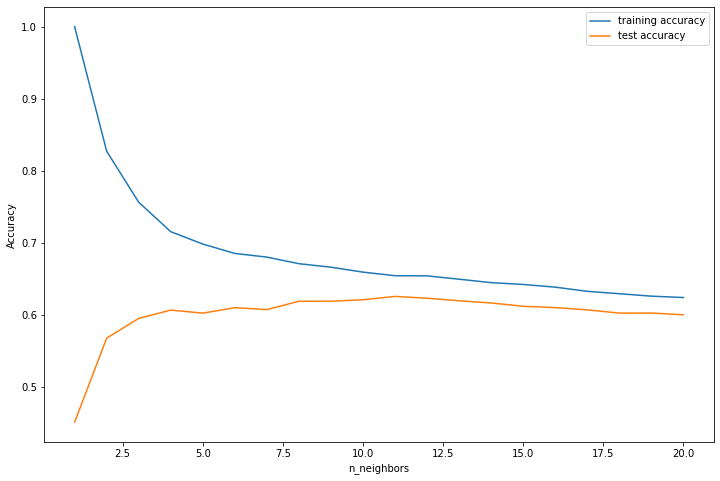

The optimal number of neighbors is 11


In [36]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_STAND, y_test_STAND))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy,     label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [37]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = 19)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(X_test_STAND)



# SCORING the results
print('KNN Training Score:', knn_stand.score(X_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score :',  knn_stand.score(X_test_STAND, y_test_STAND).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train_STAND, y_train_STAND).round(4)
knn_stand_score_test  = knn_stand.score(X_test_STAND, y_test_STAND).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

KNN Training Score: 0.626
KNN Testing Score : 0.6025
KNN Train-Test Gap: 0.0235


In [38]:
# Comparing Results

In [39]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}            {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
performance = pd.DataFrame(model_performance)


# sending model results to Excel
performance.to_excel('./model_results/linear_model_performance_hc.xlsx',
                           index = False)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.6308            0.6532
Lasso      0.0           -0.0001
ARD        0.691           0.6899




In [40]:
prediction_results = pd.DataFrame(data = {
    'Original Revenue' : y_test_FULL,
    'LR Predictions'       : lr_pred.round(decimals = 2),
    'Lasso Predictions'    : lasso_pred.round(decimals = 2),
    'ARD Predictions'      : ard_pred.round(decimals = 2),
    'LR Deviation'         : lr_pred.round(decimals = 2) - y_test_FULL,
    'Lasso Deviation'      : lasso_pred.round(decimals = 2) - y_test_FULL,
    'ARD Deviation'        : ard_pred.round(decimals = 2) - y_test_FULL,
    })


prediction_results.to_excel(excel_writer = './model_results/linear_model_predictions_hc.xlsx',
                            index = False)

In [41]:
# comparing results

print(f"""
KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      1             {knn_reg_score_train}              {knn_reg_score_test}
Non-Standardized      14            {knn_opt_score_train}            {knn_opt_score_test}
Standardized          6             {knn_stand_score_train}           {knn_stand_score_test}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['KNN_Not_Standardized', 'KNN_Not_Standardized_Opt', 'KNN_Standardized_Opt'],
           
    
    'Training' : [knn_reg_score_train,
                  knn_opt_score_train,
                  knn_stand_score_train],
           
    
    'Testing'  : [knn_reg_score_test,
                  knn_opt_score_test,
                  knn_stand_score_test],
                    
    
    'Train-Test Gap' : [knn_reg_test_gap,
                        knn_opt_test_gap,
                        knn_stand_test_gap],
                   
    
    'Model Size' : ["NA", " NA", " NA"],
                    
    'Model'      : ["NA", "NA", "NA"] }


KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      1             1.0              -0.1578
Non-Standardized      14            0.3896            0.3199
Standardized          6             0.626           0.6025



In [46]:
# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# concatenating with former performance DataFrame
total_performance = pd.concat([performance, model_performance],
                              axis = 0)


total_performance.sort_values(by = 'Testing',
                              ascending = False)


# sending model results to Excel
total_performance.to_excel('./datasets/linear_model_performance_hc.xlsx',
                           index = False)


# checking the results
total_performance

,Model Type,Training,Testing,Train-Test Gap,Model Size,Model
0,OLS,0.6308,0.6532,0.0224,24,"[(intercept, -5315.51), (CROSS_SELL_SUCCESS, -..."
1,Lasso,0.0000,-0.0001,0.0001,12,"[(intercept, 3.27), (UNIQUE_MEALS_PURCH, -0.0)..."
2,ARD,0.6910,0.6899,0.0011,16,"[(intercept, 1.56), (CROSS_SELL_SUCCESS, -0.01..."
0,KNN_Not_Standardized,1.0000,-0.1578,1.1578,NA,NA
1,KNN_Not_Standardized_Opt,0.3896,0.3199,0.0697,NA,NA
2,KNN_Standardized_Opt,0.6260,0.6025,0.0235,NA,NA


In [47]:
# converting model_performance into a DataFrame
knn_predictions = pd.DataFrame({
    'KNN' : knn_stand_pred.round(decimals = 2),
    'KNN Deviations' : knn_stand_pred.round(decimals = 2) - prediction_results['Original Revenue']})


# concatenating with former performance DataFrame
all_predictions = pd.concat([prediction_results, knn_predictions],
                              axis = 1)


# sending model results to Excel
all_predictions.to_excel('./datasets/linear_model_performance_hc.xlsx',
                           index = False)


# checking the results
all_predictions.head(n = 5)

,Original Revenue,LR Predictions,Lasso Predictions,ARD Predictions,LR Deviation,Lasso Deviation,ARD Deviation,KNN,KNN Deviations
640,3.000000,963.52,3.27,2.96,960.520000,0.270000,-0.040000,1134.16,1131.160000
49,2.809560,214.40,3.27,2.78,211.590440,0.460440,-0.029560,795.79,792.980440
1307,3.240549,2438.44,3.27,3.30,2435.199451,0.029451,0.059451,2151.05,2147.809451
914,3.398374,1105.60,3.27,3.11,1102.201626,-0.128374,-0.288374,1750.36,1746.961626
803,3.629410,3057.05,3.27,3.41,3053.420590,-0.359410,-0.219410,2329.64,2326.010590


In [48]:
# Conclusion

In [49]:
print("""
While the most_trusted model is ARD(highest test score), As OLS has the most R square as 0.7038 and minimal Train-Test Gap, we should use lasso as our final model:
Log Revenue = 
('intercept', 1.67)
('CROSS_SELL_SUCCESS', -0.02)
('log_TOTAL_MEALS_ORDERED', 0.25)
('UNIQUE_MEALS_PURCH', -0.01)
('CONTACTS_W_CUSTOMER_SERVICE', 0.01)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('log_AVG_TIME_PER_SITE_VISIT', -0.07)
('MOBILE_NUMBER', 0.01)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', -0.01)
('TASTES_AND_PREFERENCES', 0.01)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.01)
('WEEKLY_PLAN', -0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.01)
('REFRIGERATED_LOCKER', -0.01)
('log_AVG_PREP_VID_TIME', 0.58)
('LARGEST_ORDER_SIZE', -0.02)
('MASTER_CLASSES_ATTENDED', 0.03)
('MEDIAN_MEAL_RATING', 0.06)
('AVG_CLICKS_PER_VISIT', -0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
""")


As OLS has the most Training	Testing score as 0.7038 and minimal Train-Test Gap, we should use lasso as our final model:
Log Revenue = 
('intercept', 1.67)
('CROSS_SELL_SUCCESS', -0.02)
('log_TOTAL_MEALS_ORDERED', 0.25)
('UNIQUE_MEALS_PURCH', -0.01)
('CONTACTS_W_CUSTOMER_SERVICE', 0.01)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('log_AVG_TIME_PER_SITE_VISIT', -0.07)
('MOBILE_NUMBER', 0.01)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', -0.01)
('TASTES_AND_PREFERENCES', 0.01)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.01)
('WEEKLY_PLAN', -0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.01)
('REFRIGERATED_LOCKER', -0.01)
('log_AVG_PREP_VID_TIME', 0.58)
('LARGEST_ORDER_SIZE', -0.02)
('MASTER_CLASSES_ATTENDED', 0.03)
('MEDIAN_MEAL_RATING', 0.06)
('AVG_CLICKS_PER_VISIT', -0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)

